<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

# Problem Statement

Longer time are taken to sell a house due to long negotiation of the sale price

### Contents:
1. Background
2. Importing Libraries
3. Loading of Datasets
4. Exploration of Datasets
5. Cleaning of Datasets
6. Feature Engineering
7. Regression and Modeling
8. Prediction for Target Variable (SalePrice) on Test Dataset using the Best Model
9. Conclusions and Recommendations

# 1. Background

The number of sales in houses have increased over the years. However, a sale of one single house is a long process and the delay was caused due to the negotiation between buyer and seller. As a seller, they will want to sell their house at a higher price while buyers will want to get a better lower price. Being a new tech start up firm, the idea is to create an application (app) to resolve this long extended negotiation time by providing the most accurate sale price based on the features of the house.

This project will be ultilizing the Ames Housing Dataset which is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses Furthermore, the predicted sale prices based on the best model will be submitted to participte in the Kaggle Challenge to determine how the model does against unknown data. Exploration, cleaning, features engineering and modelling will be done using this data, to acheive the best model in predicting the sale prices. A full model with all the features will be produce. A prototype will be generated by implementing feature selection method to select the 10 best features for modeling.

During the exploration process, outliers were observed for features with mid to high correlations with sale price as well as missing values for some of the features. Cleaning of the data were done to remove the outliers and filled in the missing values. To further improve the model performmance, datas were selected and transform into features that better represent to predict sale price. Linear, Ridge and Lasso regressions together with scaling, train test split, cross validations were used in the modeling stage. The evaluation will be judged based on Root Mean Square Error (RMSE).

# 2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
import statsmodels.api as sm

from sklearn import metrics

# 3. Loading of Datasets

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# 4. Exploration of Datasets

## 4.1 test Dataset

In [3]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
test.isnull().sum().sort_values(ascending = False)

Pool QC          874
Misc Feature     837
Alley            820
Fence            706
Fireplace Qu     422
                ... 
Bsmt Unf SF        0
Total Bsmt SF      0
PID                0
Heating QC         0
Sale Type          0
Length: 80, dtype: int64

In [5]:
test.shape

(878, 80)

## 4.2 train Dataset

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
train.shape

(2051, 81)

In [8]:
pd.set_option('display.min_rows', None)
train.isnull().sum().sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Mo Sold              0
Sale Type            0
Full Bath            0
Half Bath            0
                  ... 
MS Zoning            0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style

### 4.2.1 Finding the features which have the higher correlations with the our target variable 'SalePrice'

In [9]:
corr = train.corr().abs()
corr['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
PID                0.255052
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Enclosed Porch     0.135656
Screen Porch       0.134581
Kitchen AbvGr      0.125444
Overall Cond       0.097019
MS SubClass        0.087335
Id                 0.051398
3Ssn Porch         0.048732
Bsmt Half Bath     0.045328
Low Qual Fin SF    0.041594
Mo Sold            0.032735
Pool Area          0

### 4.2.2 Plot scatter plots based on features which have > 0.6 correlation with 'SalePrice' to find any outliers

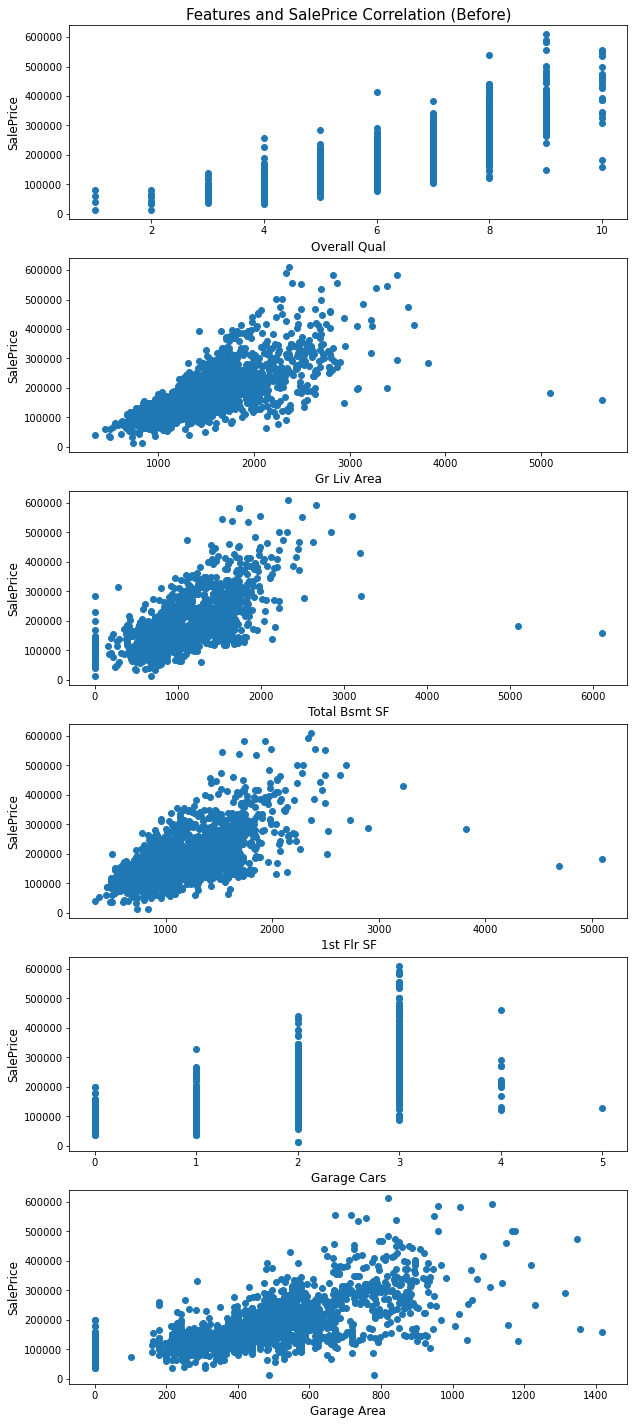

In [10]:
fig, ax = plt.subplots(6, figsize = (10, 25))

ax[0].set_title('Features and SalePrice Correlation (Before)', fontsize = 15)
ax[0].scatter(train['Overall Qual'], train['SalePrice'])
ax[0].set_xlabel("Overall Qual", fontsize = 12)
ax[0].set_ylabel('SalePrice', fontsize = 12)

ax[1].scatter(train['Gr Liv Area'], train['SalePrice'])
ax[1].set_xlabel('Gr Liv Area', fontsize = 12)
ax[1].set_ylabel("SalePrice", fontsize = 12);

ax[2].scatter(train['Total Bsmt SF'], train['SalePrice'])
ax[2].set_xlabel('Total Bsmt SF', fontsize = 12)
ax[2].set_ylabel("SalePrice", fontsize = 12);

ax[3].scatter(train['1st Flr SF'], train['SalePrice'])
ax[3].set_xlabel('1st Flr SF', fontsize = 12)
ax[3].set_ylabel("SalePrice", fontsize = 12);

ax[4].scatter(train['Garage Cars'], train['SalePrice'])
ax[4].set_xlabel('Garage Cars', fontsize = 12)
ax[4].set_ylabel("SalePrice", fontsize = 12);

ax[5].scatter(train['Garage Area'], train['SalePrice'])
ax[5].set_xlabel('Garage Area', fontsize = 12)
ax[5].set_ylabel("SalePrice", fontsize = 12);

In [11]:
train.loc[(train['Overall Qual'] == 6) & (train['SalePrice'] > 400000) | 
          (train['Overall Qual'] == 8) & (train['SalePrice'] > 500000) |
          (train['Overall Qual'] == 9) & (train['SalePrice'] < 200000) |
          (train['Gr Liv Area'] > 4000) & (train['SalePrice'] > 0) |
          (train['Total Bsmt SF'] > 4000) & (train['SalePrice'] > 0) |
          (train['1st Flr SF'] > 3000) & (train['SalePrice'] > 0) |
          (train['Garage Cars'] == 5) & (train['SalePrice'] > 0) |
          (train['Garage Cars'] == 4) & (train['SalePrice'] > 400000) |
          (train['Garage Cars'] == 2) & (train['SalePrice'] < 13000) | 
          (train['Garage Cars'] == 1) & (train['SalePrice'] > 300000)
         ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
125,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,150000
328,1773,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,430000
332,1060,528118090,60,RL,96.0,12539,Pave,NaN,Reg,Lvl,...,192,0,NaN,NaN,NaN,0,6,2008,WD,460000
463,2257,916253320,120,RM,NaN,9763,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2007,WD,330000
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
823,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,...,210,0,NaN,NaN,NaN,0,6,2010,WD,538000
925,747,903236040,30,RM,50.0,8635,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,126500
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


# 5. Cleaning of Datasets

## 5.1 Removing of Outliers

In [12]:
train.shape

(2051, 81)

In [13]:
train.drop(index = [125, 328, 332, 463, 616, 823, 925, 960, 1628, 1885, 1897], axis = 0, inplace = True)

In [14]:
train.shape

(2040, 81)

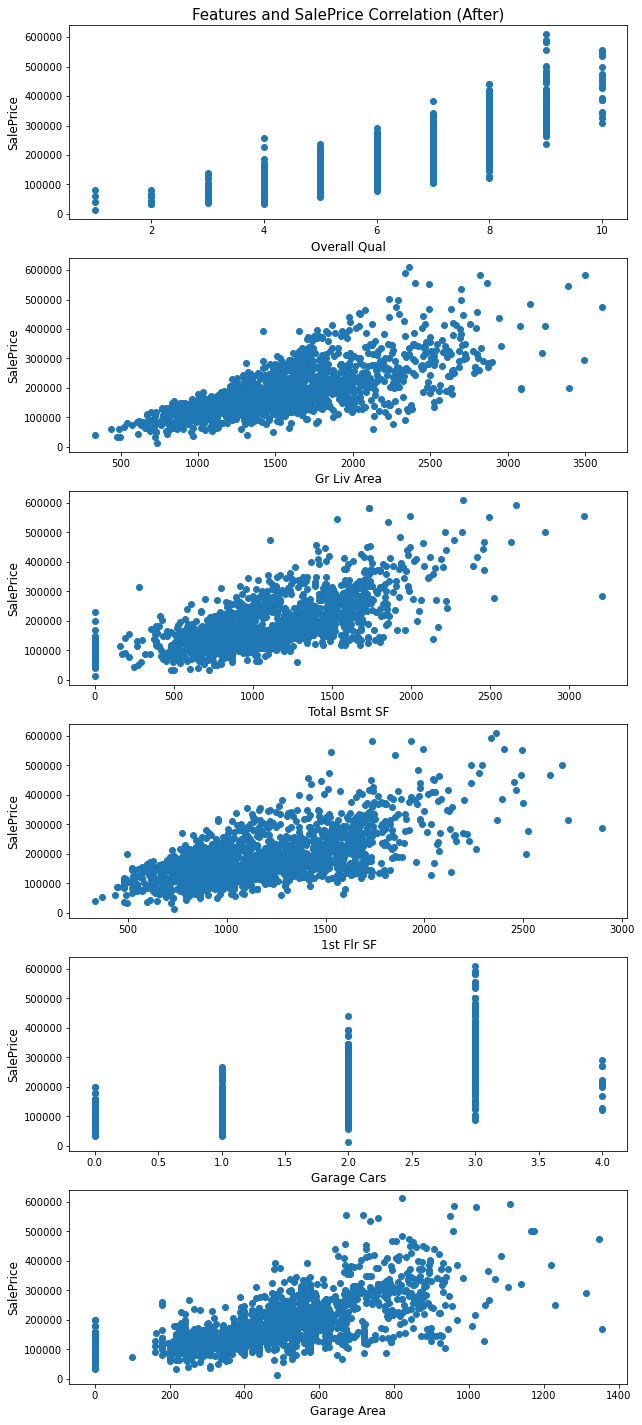

In [15]:
# Plot again to make sure the right outliers are removed
fig, ax = plt.subplots(6, figsize = (10, 25))

ax[0].set_title('Features and SalePrice Correlation (After)', fontsize = 15)
ax[0].scatter(train['Overall Qual'], train['SalePrice'])
ax[0].set_xlabel("Overall Qual", fontsize = 12)
ax[0].set_ylabel('SalePrice', fontsize = 12)

ax[1].scatter(train['Gr Liv Area'], train['SalePrice'])
ax[1].set_xlabel('Gr Liv Area', fontsize = 12)
ax[1].set_ylabel("SalePrice", fontsize = 12);

ax[2].scatter(train['Total Bsmt SF'], train['SalePrice'])
ax[2].set_xlabel('Total Bsmt SF', fontsize = 12)
ax[2].set_ylabel("SalePrice", fontsize = 12);

ax[3].scatter(train['1st Flr SF'], train['SalePrice'])
ax[3].set_xlabel('1st Flr SF', fontsize = 12)
ax[3].set_ylabel("SalePrice", fontsize = 12);

ax[4].scatter(train['Garage Cars'], train['SalePrice'])
ax[4].set_xlabel('Garage Cars', fontsize = 12)
ax[4].set_ylabel("SalePrice", fontsize = 12);

ax[5].scatter(train['Garage Area'], train['SalePrice'])
ax[5].set_xlabel('Garage Area', fontsize = 12)
ax[5].set_ylabel("SalePrice", fontsize = 12);

## 5.2 Dealing with missing values

### Find out which columns has missing values

In [16]:
train.columns[train.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [17]:
test.columns[test.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

### 5.2.1 Pool QC

#### Map 'Pool QC' to binary where 0 = No pool, 1 = Fair, 2 = Typical, 3 = Good, 4 = Excellent

In [18]:
print(train['Pool QC'].isnull().sum())
print(test['Pool QC'].isnull().sum())

2032
874


In [19]:
train['Pool QC'].fillna(0, inplace = True)
test['Pool QC'].fillna(0, inplace = True)

In [20]:
train['Pool QC'] = train['Pool QC'].replace({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})
test['Pool QC'] = test['Pool QC'].replace({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})

In [21]:
print(train['Pool QC'].value_counts())
print(test['Pool QC'].value_counts())

0    2032
3       3
1       2
2       2
4       1
Name: Pool QC, dtype: int64
0    874
4      3
2      1
Name: Pool QC, dtype: int64


### 5.2.2 Misc Feature

#### Map 'Misc Feature' to whether Yes = 1 or No = 0 to indicate whether the house has a Misc feature (Elevator, 2nd Garage, Shed, Tennis Court, Others) since the number of houses which have Misc Feature is very minimal

In [22]:
print(train['Misc Feature'].isnull().sum())
print(test['Misc Feature'].isnull().sum())

1976
837


In [23]:
print(train['Misc Feature'].value_counts())
print(test['Misc Feature'].value_counts())

Shed    56
Gar2     4
Othr     3
TenC     1
Name: Misc Feature, dtype: int64
Shed    39
Othr     1
Gar2     1
Name: Misc Feature, dtype: int64


In [24]:
train['Misc Feature'].fillna(0, inplace = True)
test['Misc Feature'].fillna(0, inplace = True)

In [25]:
train['Misc Feature'] = train['Misc Feature'].replace({'Shed': 1, 'Gar2': 1, 'Othr': 1, 'TenC':1, 'Elev':1 })
test['Misc Feature'] = test['Misc Feature'].replace({'Shed': 1, 'Gar2': 1, 'Othr': 1, 'TenC':1, 'Elev':1 })

In [26]:
print(train['Misc Feature'].value_counts())
print(test['Misc Feature'].value_counts())

0    1976
1      64
Name: Misc Feature, dtype: int64
0    837
1     41
Name: Misc Feature, dtype: int64


### 5.2.3 Lot Frontage

#### Fill missing values for 'Lot Frontage' with the mean

In [27]:
print(train['Lot Frontage'].isnull().sum())
print(test['Lot Frontage'].isnull().sum())

327
160


In [28]:
train_lotfrontage_mean = round(train['Lot Frontage'].mean())
print(train_lotfrontage_mean)
test_lotfrontage_mean = round(test['Lot Frontage'].mean())
print(test_lotfrontage_mean)

69
70


In [29]:
train['Lot Frontage'].fillna(train_lotfrontage_mean, inplace = True)
test['Lot Frontage'].fillna(test_lotfrontage_mean, inplace = True)

In [30]:
print(train['Lot Frontage'].isnull().sum())
print(test['Lot Frontage'].isnull().sum())

0
0


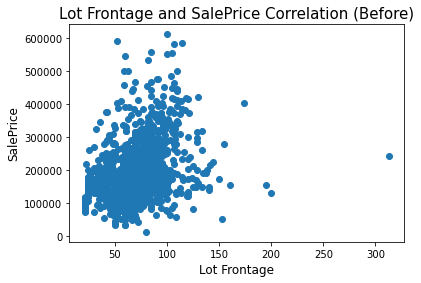

In [31]:
# Plot scatter graph against SalePrice to check for outliers (train dataset)
plt.title('Lot Frontage and SalePrice Correlation (Before)', fontsize = 15)
plt.scatter(train['Lot Frontage'], train['SalePrice'])
plt.xlabel("Lot Frontage", fontsize = 12)
plt.ylabel('SalePrice', fontsize = 12);

In [32]:
train.shape

(2040, 81)

In [33]:
# Remove the outlier where the only "Lot Frontage" is more than 300
train.loc[(train['Lot Frontage'] > 300) & (train['SalePrice'] > 100000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,...,0,0,0,NaN,0,0,11,2008,WD,242000


In [34]:
train.drop(index = [1335], inplace = True)

In [35]:
train.shape

(2039, 81)

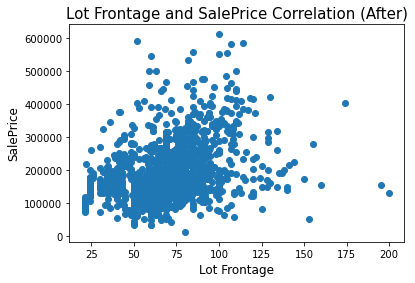

In [36]:
# Plot again to make sure outliers (train dataset) are removed
plt.title('Lot Frontage and SalePrice Correlation (After)', fontsize = 15)
plt.scatter(train['Lot Frontage'], train['SalePrice'])
plt.xlabel("Lot Frontage", fontsize = 12)
plt.ylabel('SalePrice', fontsize = 12);

### 5.2.4 Masonary Veener

### Train Dataset (Mas Vnr Area)

#### The total number of missing values and None/0 for 'Mas Vnr Type' and 'Mas Vnr Area' respectively are 1240 and 1238. We will assume that the missing values are None/0 however with a discrepancy of 2. 

In [37]:
print(train[['Mas Vnr Area']].value_counts())

Mas Vnr Area
0.0             1210
120.0             11
200.0             10
176.0             10
16.0               9
180.0              9
108.0              9
72.0               9
210.0              9
132.0              8
40.0               8
186.0              7
170.0              7
144.0              7
178.0              6
60.0               6
203.0              6
140.0              6
128.0              6
340.0              6
84.0               6
256.0              6
164.0              5
504.0              5
174.0              5
360.0              5
320.0              5
112.0              5
300.0              5
106.0              5
                ... 
380.0              1
381.0              1
382.0              1
337.0              1
332.0              1
237.0              1
279.0              1
251.0              1
253.0              1
255.0              1
257.0              1
258.0              1
259.0              1
261.0              1
262.0              1
46.0               1


In [38]:
print(train['Mas Vnr Area'].isnull().sum())

22


In [39]:
train['Mas Vnr Area'].fillna(0, inplace = True)

In [40]:
train['Mas Vnr Area'].isnull().sum()

0

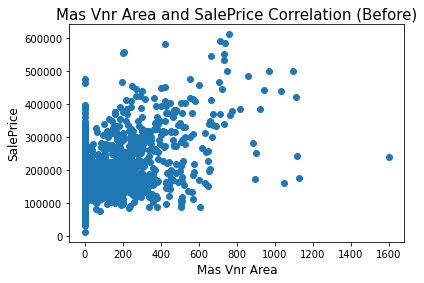

In [41]:
# Noted there is a 1600 Mas Vnr Area. Plot scatter graph against SalePrice

plt.title('Mas Vnr Area and SalePrice Correlation (Before)', fontsize = 15)
plt.scatter(train['Mas Vnr Area'], train['SalePrice'])
plt.xlabel("Mas Vnr Area", fontsize = 12)
plt.ylabel('SalePrice', fontsize = 12);

In [42]:
train.shape

(2039, 81)

In [43]:
# Locate the outlier
train.loc[(train['Mas Vnr Area'] > 1200) & (train['SalePrice'] > 100000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1409,1850,533241030,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,...,198,0,0,NaN,0,0,6,2007,WD,239000


In [44]:
# Remove the outlier
train.drop(index = 1409, inplace = True)

In [45]:
train.shape

(2038, 81)

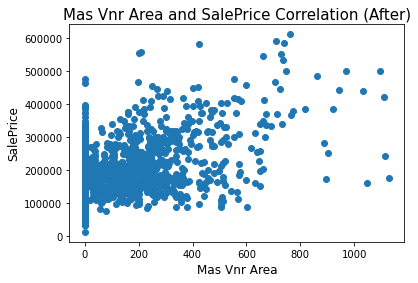

In [46]:
# Plot again to make sure outlier is removed 

plt.title('Mas Vnr Area and SalePrice Correlation (After)', fontsize = 15)
plt.scatter(train['Mas Vnr Area'], train['SalePrice'])
plt.xlabel("Mas Vnr Area", fontsize = 12)
plt.ylabel('SalePrice', fontsize = 12);

### Train Dataset (Mas Vnr Type)

In [47]:
train['Mas Vnr Type'].fillna('None', inplace = True)

In [48]:
train['Mas Vnr Type'].value_counts()

None       1234
BrkFace     625
Stone       166
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [49]:
train['Mas Vnr Type'].isnull().sum()

0

### Test Dataset 'Mas Vnr Type' & 'Mas Vnr Area'

##### Since both 'Mas Vnr Type' & 'Mas Vnr Area' are the same, will assume that there is no Masonary Veener for this. Replace 'Mas Vnr Type' missing values to 'None' and 'Mas Vnr Area' to 0 to indicate the house does not have Masonry Veener

In [50]:
print(test['Mas Vnr Type'].isnull().sum())
print(test['Mas Vnr Area'].isnull().sum())

1
1


In [51]:
print(test['Mas Vnr Type'].value_counts())
print(test['Mas Vnr Area'].value_counts())

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64
0.0       532
216.0       7
80.0        5
420.0       5
196.0       5
340.0       4
144.0       4
120.0       4
180.0       3
456.0       3
302.0       3
285.0       3
194.0       3
90.0        3
270.0       3
149.0       3
182.0       3
50.0        3
200.0       3
176.0       3
198.0       3
240.0       3
306.0       3
88.0        3
128.0       3
260.0       2
16.0        2
174.0       2
209.0       2
161.0       2
         ... 
515.0       1
444.0       1
788.0       1
32.0        1
1170.0      1
11.0        1
432.0       1
399.0       1
23.0        1
405.0       1
295.0       1
91.0        1
52.0        1
304.0       1
101.0       1
312.0       1
287.0       1
51.0        1
261.0       1
281.0       1
89.0        1
388.0       1
66.0        1
65.0        1
142.0       1
233.0       1
189.0       1
34.0        1
771.0       1
415.0       1
Name: Mas Vnr Area, Length: 232, dtype

In [52]:
test['Mas Vnr Type'].fillna('None', inplace = True)
test['Mas Vnr Area'].fillna('None', inplace = True)

In [53]:
print(test['Mas Vnr Type'].isnull().sum())
print(test['Mas Vnr Area'].isnull().sum())

0
0


### 5.2.5 Basement

#### Replace 'Bsmt Qual' to binary where 0 = No Basement, 1 = Poor, 2 = Fair, 3 = Typical, 4 = Good, 5 = Excellent

In [54]:
print(train['Bsmt Qual'].isnull().sum())
print(test['Bsmt Qual'].isnull().sum())

54
25


In [55]:
print(train['Bsmt Qual'].value_counts())
print(test['Bsmt Qual'].value_counts())

TA    885
Gd    858
Ex    181
Fa     59
Po      1
Name: Bsmt Qual, dtype: int64
TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64


In [56]:
train['Bsmt Qual'].fillna(0, inplace = True)
test['Bsmt Qual'].fillna(0, inplace = True)

In [57]:
train['Bsmt Qual'] = train['Bsmt Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test['Bsmt Qual'] = test['Bsmt Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [58]:
print(train['Bsmt Qual'].value_counts())
print(test['Bsmt Qual'].value_counts())

3    885
4    858
5    181
2     59
0     54
1      1
Name: Bsmt Qual, dtype: int64
3    396
4    355
5     73
2     28
0     25
1      1
Name: Bsmt Qual, dtype: int64


#### Replace 'Bsmt Cond' to binary where 0 = No Basement, 1 = Poor, 2 = Fair, 3 = Typical, 4 = Good, 5 = Excellent

In [59]:
print(train['Bsmt Cond'].isnull().sum())
print(test['Bsmt Cond'].isnull().sum())

54
25


In [60]:
print(train['Bsmt Cond'].value_counts())
print(test['Bsmt Cond'].value_counts())

TA    1823
Gd      89
Fa      64
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
TA    781
Fa     39
Gd     33
Name: Bsmt Cond, dtype: int64


In [61]:
train['Bsmt Cond'].fillna(0, inplace = True)
test['Bsmt Cond'].fillna(0, inplace = True)

In [62]:
train['Bsmt Cond'] = train['Bsmt Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test['Bsmt Cond'] = test['Bsmt Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [63]:
print(train['Bsmt Cond'].value_counts())
print(test['Bsmt Cond'].value_counts())

3    1823
4      89
2      64
0      54
1       5
5       3
Name: Bsmt Cond, dtype: int64
3    781
2     39
4     33
0     25
Name: Bsmt Cond, dtype: int64


#### Replace 'Bsmt Exposure' to binary where 0 = No Basement, 1 = No Exposure, 2 = Mimimum Exposure, 3 = Average Exposure, 5 = good Exposure

In [64]:
print(train['Bsmt Exposure'].isnull().sum())
print(test['Bsmt Exposure'].isnull().sum())

57
25


In [65]:
print(train['Bsmt Exposure'].value_counts())
print(test['Bsmt Exposure'].value_counts())

No    1332
Av     288
Gd     198
Mn     163
Name: Bsmt Exposure, dtype: int64
No    567
Av    130
Gd     80
Mn     76
Name: Bsmt Exposure, dtype: int64


In [66]:
train['Bsmt Exposure'].fillna(0, inplace = True)
test['Bsmt Exposure'].fillna(0, inplace = True)

In [67]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].replace({'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
test['Bsmt Exposure'] = test['Bsmt Exposure'].replace({'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

In [68]:
print(train['Bsmt Exposure'].value_counts())
print(test['Bsmt Exposure'].value_counts())

1    1332
3     288
4     198
2     163
0      57
Name: Bsmt Exposure, dtype: int64
1    567
3    130
4     80
2     76
0     25
Name: Bsmt Exposure, dtype: int64


#### Map 'BsmtFin Type 1' to binary where 0 = No Basement, 1 = Unfinshed, 2 = Low Quality, 3 = Average Rec Room, 4 = Below Average Living Quarters, 5 = Average Living Quarters, 6 = Good Living Quarters

In [69]:
print(train['BsmtFin Type 1'].isnull().sum())
print(test['BsmtFin Type 1'].isnull().sum())

54
25


In [70]:
print(train['BsmtFin Type 1'].value_counts())
print(test['BsmtFin Type 1'].value_counts())

GLQ    608
Unf    602
ALQ    292
BLQ    199
Rec    182
LwQ    101
Name: BsmtFin Type 1, dtype: int64
Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64


In [71]:
train['BsmtFin Type 1'].fillna(0, inplace = True)
test['BsmtFin Type 1'].fillna(0, inplace = True)

In [72]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6})
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6})

In [73]:
print(train['BsmtFin Type 1'].value_counts())
print(test['BsmtFin Type 1'].value_counts())

6    608
1    602
5    292
4    199
3    182
2    101
0     54
Name: BsmtFin Type 1, dtype: int64
1    248
6    243
5    136
3    105
4     69
2     52
0     25
Name: BsmtFin Type 1, dtype: int64


#### Fill 'BsmtFin SF 1' only one missing value to 0 as total unfinished or no basement is 658. Total zero values for 'BsmtFin SF 1' is 657, so that account for the one missing value.

In [74]:
print(train['BsmtFin SF 1'].isnull().sum())
print(test['BsmtFin SF 1'].isnull().sum())

1
0


In [75]:
train['BsmtFin SF 1'].value_counts()

0.0       655
24.0       17
16.0       10
384.0       7
300.0       7
20.0        7
624.0       6
360.0       6
368.0       6
456.0       6
312.0       6
700.0       6
432.0       5
625.0       5
1200.0      5
648.0       5
120.0       5
288.0       5
553.0       5
276.0       5
330.0       5
686.0       5
637.0       5
836.0       4
507.0       4
468.0       4
450.0       4
28.0        4
336.0       4
56.0        4
         ... 
833.0       1
1456.0      1
481.0       1
906.0       1
1157.0      1
881.0       1
536.0       1
909.0       1
954.0       1
932.0       1
1733.0      1
632.0       1
1154.0      1
1053.0      1
173.0       1
764.0       1
1440.0      1
514.0       1
203.0       1
306.0       1
344.0       1
1880.0      1
867.0       1
1636.0      1
1086.0      1
1314.0      1
938.0       1
1247.0      1
170.0       1
415.0       1
Name: BsmtFin SF 1, Length: 813, dtype: int64

In [76]:
train['BsmtFin SF 1'].fillna(0, inplace = True)
print(train['BsmtFin SF 1'].isnull().sum())

0


#### Map 'BsmtFin Type 2' to binary where 0 = No Basement, 1 = Unfinshed, 2 = Low Quality, 3 = Average Rec Room, 4 = Below Average Living Quarters, 5 = Average Living Quarters, 6 = Good Living Quarters

In [77]:
print(train['BsmtFin Type 2'].isnull().sum())
print(test['BsmtFin Type 2'].isnull().sum())

55
25


In [78]:
print(train['BsmtFin Type 2'].value_counts())
print(test['BsmtFin Type 2'].value_counts())

Unf    1738
Rec      80
LwQ      60
BLQ      48
ALQ      34
GLQ      23
Name: BsmtFin Type 2, dtype: int64
Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64


In [79]:
train['BsmtFin Type 2'].fillna(0, inplace = True)
test['BsmtFin Type 2'].fillna(0, inplace = True)

In [80]:
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6})
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6})

In [81]:
print(train['BsmtFin Type 2'].value_counts())
print(test['BsmtFin Type 2'].value_counts())

1    1738
3      80
2      60
0      55
4      48
5      34
6      23
Name: BsmtFin Type 2, dtype: int64
1    749
2     29
3     26
0     25
4     20
5     18
6     11
Name: BsmtFin Type 2, dtype: int64


#### Fill 'BsmtFin SF 2' only one missing value to 0 as total unfinished or no basement is 1805. Total zero values for 'BsmtFin SF 2' is 1803, so the missing value will be fill in as 0

In [82]:
train['BsmtFin SF 2'].isnull().sum()

1

In [83]:
train['BsmtFin SF 2'].fillna(0, inplace = True)

In [84]:
train['BsmtFin SF 2'].value_counts()

0.0       1792
294.0        5
162.0        3
539.0        3
180.0        3
483.0        3
116.0        2
670.0        2
108.0        2
469.0        2
127.0        2
590.0        2
495.0        2
60.0         2
117.0        2
128.0        2
202.0        2
273.0        2
80.0         2
110.0        2
144.0        2
159.0        2
596.0        2
96.0         2
465.0        2
551.0        2
105.0        2
72.0         2
290.0        2
620.0        2
          ... 
419.0        1
441.0        1
40.0         1
688.0        1
624.0        1
774.0        1
1057.0       1
12.0         1
93.0         1
196.0        1
852.0        1
6.0          1
351.0        1
375.0        1
622.0        1
252.0        1
906.0        1
106.0        1
113.0        1
345.0        1
768.0        1
263.0        1
875.0        1
750.0        1
374.0        1
497.0        1
522.0        1
123.0        1
891.0        1
149.0        1
Name: BsmtFin SF 2, Length: 205, dtype: int64

#### Fill 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath' with their means since they only have 1 - 2 missing values 

In [85]:
print(train['Bsmt Unf SF'].isnull().sum())
print(train['Total Bsmt SF'].isnull().sum())
print(train['Bsmt Full Bath'].isnull().sum())
print(train['Bsmt Half Bath'].isnull().sum())

1
1
1
1


In [86]:
basement_unf_sf_mean = round(train['Bsmt Unf SF'].mean())
train['Bsmt Unf SF'].fillna(basement_unf_sf_mean, inplace = True)

In [87]:
total_basement_sf_mean = round(train['Total Bsmt SF'].mean())
train['Total Bsmt SF'].fillna(total_basement_sf_mean, inplace = True)

In [88]:
basement_halfbath_mean = round(train['Bsmt Half Bath'].mean())
train['Bsmt Half Bath'].fillna(basement_halfbath_mean, inplace = True)

In [89]:
basement_fullbath_mean = round(train['Bsmt Full Bath'].mean())
train['Bsmt Full Bath'].fillna(basement_fullbath_mean, inplace = True)

#### Replace 'Fireplace Qu' to binary where 0 = No Basement, 1 = Poor, 2 = Fair, 3 = Typical, 4 = Good, 5 = Excellent

In [90]:
print(train['Fireplace Qu'].isnull().sum())
print(test['Fireplace Qu'].isnull().sum())

999
422


In [91]:
train['Fireplace Qu'].fillna(0, inplace = True)
test['Fireplace Qu'].fillna(0, inplace = True)

In [92]:
train['Fireplace Qu'] = train['Fireplace Qu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test['Fireplace Qu'] = test['Fireplace Qu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [93]:
print(train['Fireplace Qu'].value_counts())
print(test['Fireplace Qu'].value_counts())

0    999
4    514
3    405
2     59
1     31
5     30
Name: Fireplace Qu, dtype: int64
0    422
4    220
3    193
2     16
1     15
5     12
Name: Fireplace Qu, dtype: int64


### 5.2.6 Garage

### train Dataset

#### There are 114 houses without a Garage. Fill missing values for 'Garage Yr Blt' as 0. Replace 'Garage Qual' & 'Garage Cond' to binary where 0 = No Garage, 1 = Poor, 2 = Fair, 3 = Typical, 4 = Good, 5 = Excellent and ''Garage Finish' to binary where 0 = No Garage, 1 = Unfinished, 2 = Rough Finished, 3 = Finished 

In [94]:
print(train['Garage Type'].isnull().sum())
print(train['Garage Yr Blt'].isnull().sum())
print(train['Garage Finish'].isnull().sum())
print(train['Garage Qual'].isnull().sum())
print(train['Garage Cond'].isnull().sum())
print(train['Garage Cars'].isnull().sum())
print(train['Garage Area'].isnull().sum())

113
114
114
114
114
1
1


In [95]:
train['Garage Yr Blt'].fillna(0, inplace = True)
train['Garage Finish'].fillna(0, inplace = True)
train['Garage Qual'].fillna(0, inplace = True)
train['Garage Cond'].fillna(0, inplace = True)

In [96]:
train['Garage Qual'] = train['Garage Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
train['Garage Cond'] = train['Garage Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
train['Garage Finish'] = train['Garage Finish'].replace({'Unf': 1, 'RFn': 2, 'Fin': 3})

In [97]:
print(train['Garage Qual'].value_counts())
print(train['Garage Cond'].value_counts())
print(train['Garage Finish'].value_counts())
print(train['Garage Yr Blt'].value_counts())

3    1821
0     114
2      80
4      18
5       3
1       2
Name: Garage Qual, dtype: int64
3    1856
0     114
2      46
4      12
1       8
5       2
Name: Garage Cond, dtype: int64
1    845
2    575
3    504
0    114
Name: Garage Finish, dtype: int64
0.0       114
2005.0    104
2007.0     84
2006.0     80
2004.0     72
2003.0     65
1977.0     45
1998.0     44
2008.0     42
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     33
1978.0     33
1950.0     32
1968.0     32
1958.0     32
1996.0     31
1956.0     31
1966.0     29
1965.0     27
2001.0     27
1967.0     26
1995.0     26
1997.0     25
1954.0     25
1975.0     25
1962.0     25
1979.0     25
         ... 
1922.0      6
1938.0      6
1925.0      6
1942.0      6
1923.0      5
1910.0      5
1946.0      5
1982.0      5
1928.0      5
1916.0      5
1924.0      4
1921.0      4
1915.0      4
1927.0      4
1937.0      4
1931.0      3
1947.0      3
1900.0      3
1929.0      2
1932.0      2
1934.0      2
2010.0      2
1914

#### Since there are 114 houses which have garage, the number of value 0 is 113. This means the missing value is 0. Fill missing value as 0

In [98]:
print(train['Garage Cars'].value_counts())
print(train['Garage Area'].value_counts())

2.0    1129
1.0     523
3.0     260
0.0     113
4.0      12
Name: Garage Cars, dtype: int64
0.0       113
440.0      70
576.0      68
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
420.0      18
504.0      18
336.0      18
672.0      17
462.0      17
312.0      16
216.0      16
572.0      15
180.0      14
506.0      13
624.0      13
384.0      13
550.0      13
478.0      13
525.0      12
564.0      12
660.0      12
352.0      12
         ... 
729.0       1
825.0       1
509.0       1
469.0       1
284.0       1
562.0       1
886.0       1
257.0       1
195.0       1
904.0       1
938.0       1
1053.0      1
902.0       1
353.0       1
700.0       1
1231.0      1
686.0       1
601.0       1
439.0       1
263.0       1
606.0       1
292.0       1
954.0       1
741.0       1
224.0       1
959.0       1
375.0       1
890.0       1
481.0       1
485.0       1
Name: Garage Area, Length: 509, dtype: int64


In [99]:
train['Garage Cars'].fillna(0, inplace = True)
train['Garage Area'].fillna(0, inplace = True)

#### Fill missing values for 'Garage Type' as NA which means no garage

In [100]:
train['Garage Type'].fillna('NA', inplace = True)

In [101]:
train['Garage Type'].value_counts()

Attchd     1206
Detchd      532
BuiltIn     130
NA          113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

### test Dataset

#### There are 45 houses without a Garage. Fill missing values for 'Garage Yr Blt' as 0. Replace 'Garage Qual' & 'Garage Cond' to binary where 0 = No Garage, 1 = Poor, 2 = Fair, 3 = Typical, 4 = Good, 5 = Excellent and ''Garage Finish' to binary where 0 = No Garage, 1 = Unfinished, 2 = Rough Finished, 3 = Finished 

In [102]:
print(test['Garage Type'].isnull().sum())
print(test['Garage Yr Blt'].isnull().sum())
print(test['Garage Finish'].isnull().sum())
print(test['Garage Qual'].isnull().sum())
print(test['Garage Cond'].isnull().sum())

44
45
45
45
45


In [103]:
test['Garage Yr Blt'].fillna(0, inplace = True)
test['Garage Finish'].fillna(0, inplace = True)
test['Garage Qual'].fillna(0, inplace = True)
test['Garage Cond'].fillna(0, inplace = True)

In [104]:
test['Garage Qual'] = test['Garage Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test['Garage Cond'] = test['Garage Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test['Garage Finish'] = test['Garage Finish'].replace({'Unf': 1, 'RFn': 2, 'Fin': 3})

In [105]:
print(test['Garage Qual'].value_counts())
print(test['Garage Cond'].value_counts())
print(test['Garage Finish'].value_counts())
print(test['Garage Yr Blt'].value_counts())

3    782
0     45
2     42
4      6
1      3
Name: Garage Qual, dtype: int64
3    796
0     45
2     27
1      6
4      3
5      1
Name: Garage Cond, dtype: int64
1    382
2    233
3    218
0     45
Name: Garage Finish, dtype: int64
0.0       45
2005.0    37
2006.0    35
2007.0    30
2004.0    27
2003.0    26
1977.0    20
1950.0    19
1997.0    18
2008.0    17
1993.0    16
1974.0    16
1968.0    16
1960.0    16
1999.0    15
1976.0    15
1969.0    14
1957.0    14
1980.0    14
2000.0    14
2001.0    14
1994.0    14
1998.0    14
1959.0    13
2002.0    13
1963.0    12
1920.0    12
1970.0    12
2009.0    12
1954.0    12
          ..
1941.0     4
1983.0     4
1949.0     4
1946.0     4
1953.0     4
1924.0     4
1986.0     3
1915.0     3
1982.0     3
2010.0     3
1975.0     3
1900.0     3
1922.0     2
1918.0     2
1934.0     2
1947.0     2
1987.0     2
1937.0     2
1932.0     2
1917.0     1
1927.0     1
1935.0     1
1916.0     1
1943.0     1
1921.0     1
1906.0     1
1908.0     1
1931.0     1


#### Fill missing values for 'Garage Type' as NA which means no garage

In [106]:
test['Garage Type'].fillna('NA', inplace = True)

In [107]:
test['Garage Type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
NA          44
Basment      9
CarPort      4
2Types       4
Name: Garage Type, dtype: int64

### 5.2.7 Fence

#### Fill missing values for 'Fence' as NA which means no fence

In [108]:
train['Fence'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)

In [109]:
print(train['Fence'].value_counts())
print(test['Fence'].value_counts())

NA       1638
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64
NA       706
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64


### 5.2.8 Alley

#### Fill missing values for 'Alley' as NA which means no alley access

In [110]:
train['Alley'].fillna('NA', inplace = True)
test['Alley'].fillna('NA', inplace = True)

In [111]:
print(train['Alley'].value_counts())
print(test['Alley'].value_counts())

NA      1899
Grvl      85
Pave      54
Name: Alley, dtype: int64
NA      820
Grvl     35
Pave     23
Name: Alley, dtype: int64


### 5.2.9 Electrical

#### Since there is only 1 missing value, will fill it with the mode. In this case, will be Standard Circuit Breakers & Romex (SBrkr)

In [112]:
test['Electrical'].isnull().sum()

1

In [113]:
test['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [114]:
test['Electrical'].fillna('SBrkr', inplace = True)

In [115]:
test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

### Lastly, to ensure there's no missing values

In [116]:
print(train.columns[train.isnull().any()])
print(test.columns[test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


# 6. Feature Engineering

## 6.1 Creating new features by combining variables

#### Replace 'Year Remod/Add' whether if there is a remodeling or additions where 0 = No and 1 = Yes, by comparing 'Year Remod/Add' and 'Year Built'

In [117]:
print(train.shape)
print(test.shape)

(2038, 81)
(878, 80)


In [118]:
train['Remod/Add'] = np.where(train['Year Remod/Add'] - train['Year Built'] > 0, 1, 0)
test['Remod/Add'] = np.where(test['Year Remod/Add'] - test['Year Built'] > 0, 1, 0)

In [119]:
train[['Remod/Add']].head()

,Remod/Add
0,1
1,1
2,1
3,1
4,1


In [120]:
test[['Remod/Add']].head()

,Remod/Add
0,1
1,0
2,0
3,1
4,0


In [121]:
train = train.drop(columns = 'Year Remod/Add')
test = test.drop(columns = 'Year Remod/Add')

In [122]:
print(train.shape)
print(test.shape)

(2038, 81)
(878, 80)


#### Replace ['Year Built', 'Year Sold', 'Mo Sold'] to 'Age of House' by taking the difference of 'Year Sold' and ''Year Built'

In [123]:
train['Age of House'] = train['Yr Sold'] - train['Year Built']
train = train.drop(columns = ['Yr Sold', 'Year Built', 'Mo Sold'])

In [124]:
test['Age of House'] = test['Yr Sold'] - test['Year Built']
test = test.drop(columns = ['Yr Sold', 'Year Built', 'Mo Sold'])

In [125]:
train[['Age of House']].head()

,Age of House
0,34
1,13
2,57
3,4
4,110


In [126]:
test[['Age of House']].head()

,Age of House
0,96
1,29
2,0
3,84
4,46


In [127]:
print(train.shape)
print(test.shape)

(2038, 79)
(878, 78)


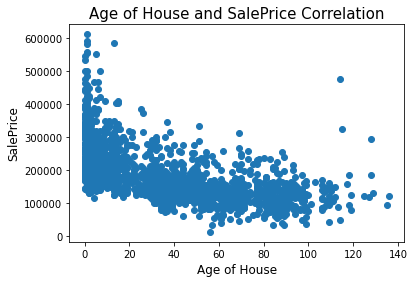

In [128]:
#Plot scatter for new feature 'Age of House' to check for outlier (train dataset)
plt.title('Age of House and SalePrice Correlation', fontsize = 15)
plt.scatter(train['Age of House'], train['SalePrice'])
plt.xlabel("Age of House", fontsize = 12)
plt.ylabel('SalePrice', fontsize = 12)
plt.show()

###### The scatter plot shows that the newer the house, the higher the sale price and sale prices decreases as the houses get older. However there are some outliers where the older houses are able to fetch a higher sale price

In [129]:
train.shape

(2038, 79)

In [130]:
# Noted that for Age (60 - 80) & Age 120, we will consider them as outlier as the sale prices are higher although the houses are older

train.loc[(train['Age of House'] > 60) & (train['SalePrice'] > 400000)]
train.loc[(train['Age of House'] > 100) & (train['SalePrice'] > 200000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Sale Type,SalePrice,Remod/Add,Age of House
1035,2667,902400110,75,RM,90.0,22950,Pave,NA,IR2,Lvl,...,410,0,0,GdPrv,0,0,WD,475000,1,114
1141,1321,902401120,75,RM,75.0,13500,Pave,NA,Reg,Lvl,...,0,0,0,NA,0,0,WD,325000,1,115
1939,1307,902207220,75,RM,87.0,18386,Pave,NA,Reg,Lvl,...,0,0,0,NA,0,0,WD,295000,1,128


In [131]:
# Remove the outliers
train.drop(index = [1035, 1141, 1939], inplace = True)

In [132]:
train.shape

(2035, 79)

#### Replace 'Garage Yr Blt' to 'New Garage' where 0 = No  and 1 = Yes by taking 'Garage Yr Blt' after year 2000 as new garage and before year 2000 after old garage

In [133]:
print(train.shape)
print(test.shape)

(2035, 79)
(878, 78)


In [134]:
train['New Garage'] = np.where(train['Garage Yr Blt'] >= 2000, 1, 0)
train = train.drop(columns = 'Garage Yr Blt')
test['New Garage'] = np.where(test['Garage Yr Blt'] >= 2000, 1, 0)
test = test.drop(columns = 'Garage Yr Blt')

In [135]:
train[['New Garage']].head()

,New Garage
0,0
1,0
2,0
3,1
4,0


In [136]:
test[['New Garage']].head()

,New Garage
0,0
1,0
2,1
3,0
4,0


In [137]:
print(train.shape)
print(test.shape)

(2035, 79)
(878, 78)


## 6.2 Get Dummies and replacing to binary

### train Dataset

#### Replace 'Heating QC' and 'Kitchen Qual'  to binary where 1 = Poor, 2 = Fair, 3 = Average/Typical, 4 = Good, 5 = Excellent

In [138]:
print(train['Heating QC'].value_counts())
print(train['Kitchen Qual'].value_counts())

Ex    1055
TA     593
Gd     317
Fa      67
Po       3
Name: Heating QC, dtype: int64
TA    1045
Gd     798
Ex     145
Fa      47
Name: Kitchen Qual, dtype: int64


In [139]:
train['Heating QC'] = train['Heating QC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
train['Kitchen Qual'] = train['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [140]:
print(train['Heating QC'].value_counts())
print(train['Kitchen Qual'].value_counts())

5    1055
3     593
4     317
2      67
1       3
Name: Heating QC, dtype: int64
3    1045
4     798
5     145
2      47
Name: Kitchen Qual, dtype: int64


#### Replace 'Central Air' to binary where 0 = No, 1 = Yes

In [141]:
train['Central Air'].value_counts()

Y    1895
N     140
Name: Central Air, dtype: int64

In [142]:
train['Central Air'] = train['Central Air'].replace({'N': 0, 'Y': 1})

In [143]:
train['Central Air'].value_counts()

1    1895
0     140
Name: Central Air, dtype: int64

#### Replace 'Functional' to binary where 0 = Salvage only, 1 = Severely Damaged, 2 = Major Deductions 2, 3 = Major Deductions 1, 4 = Moderate Deductions, 5 = Minor Deductions 2, 6 = Minor Deductions 1, 7 = Typical Functionality

In [144]:
train['Functional'].value_counts()

Typ     1900
Min2      42
Min1      42
Mod       28
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [145]:
train['Functional'] = train['Functional'].replace({'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min1':5, 'Min2': 6, "Typ": 7})

In [146]:
train['Functional'].value_counts()

7    1900
5      42
6      42
4      28
3      12
2       7
0       2
1       2
Name: Functional, dtype: int64

In [147]:
# Check the dtypes for each features to check for object dtype
dict(train.dtypes)

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('int64'),
 'Bsmt Cond': dtype('int64'),
 'Bsmt Exposure': dtype('int64'),
 'BsmtFin Type 1': dtype('int64'),
 'BsmtFin SF 1': dtype('float64'),
 'BsmtFin Type 2': dtype('

In [148]:
# Change 'MS Subclass' to object for get_dummies
train['MS SubClass'] = train['MS SubClass'].astype('O')

#### Get dummies for columns with nominal values

In [149]:
train.shape

(2035, 79)

In [150]:
train_dummies = pd.get_dummies(train, 
                               columns = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
                                         'Lot Config', 'Land Slope','Neighborhood', 'Condition 1', 'Condition 2',
                                         'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                                         'Exterior 2nd', 'Exter Qual','Exter Cond', 'Foundation', 'Garage Type',
                                         'Paved Drive', 'Fence', 'Sale Type', 'Alley', 'Heating', 'Electrical',
                                         'Mas Vnr Type', 'MS SubClass'])
train_dummies.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,109,533352170,69.0,13517,6,8,289.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
1,544,531379050,43.0,11492,7,5,132.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
2,153,535304180,68.0,7922,5,7,0.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,73.0,9802,5,5,0.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
4,255,906425045,82.0,14235,6,8,0.0,2,4,1,...,0,0,0,0,0,0,0,0,0,0


In [151]:
train_dummies.shape

(2035, 250)

In [152]:
# To check the dtypes of all the variables and make sure they all float or int
dict(train_dummies.dtypes)

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Mas Vnr Area': dtype('float64'),
 'Bsmt Qual': dtype('int64'),
 'Bsmt Cond': dtype('int64'),
 'Bsmt Exposure': dtype('int64'),
 'BsmtFin Type 1': dtype('int64'),
 'BsmtFin SF 1': dtype('float64'),
 'BsmtFin Type 2': dtype('int64'),
 'BsmtFin SF 2': dtype('float64'),
 'Bsmt Unf SF': dtype('float64'),
 'Total Bsmt SF': dtype('float64'),
 'Heating QC': dtype('int64'),
 'Central Air': dtype('int64'),
 '1st Flr SF': dtype('int64'),
 '2nd Flr SF': dtype('int64'),
 'Low Qual Fin SF': dtype('int64'),
 'Gr Liv Area': dtype('int64'),
 'Bsmt Full Bath': dtype('float64'),
 'Bsmt Half Bath': dtype('float64'),
 'Full Bath': dtype('int64'),
 'Half Bath': dtype('int64'),
 'Bedroom AbvGr': dtype('int64'),
 'Kitchen AbvGr': dtype('int64'),
 'Kitchen Qual': dtype('int64'),
 'TotRms AbvGrd': dtype('int64'),
 'Functional': dtype('

### test Dataset

In [153]:
dict(test.dtypes)

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('O'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('int64'),
 'Bsmt Cond': dtype('int64'),
 'Bsmt Exposure': dtype('int64'),
 'BsmtFin Type 1': dtype('int64'),
 'BsmtFin SF 1': dtype('int64'),
 'BsmtFin Type 2': dtype('int64'),

#### Replace 'Functional' to binary where 0 = Salvage only, 1 = Severely Damaged, 2 = Major Deductions 2, 3 = Major Deductions 1, 4 = Moderate Deductions, 5 = Minor Deductions 2, 6 = Minor Deductions 1, 7 = Typical Functionality

In [154]:
test['Functional'].value_counts()

Typ     812
Min2     28
Min1     23
Maj1      7
Mod       6
Maj2      2
Name: Functional, dtype: int64

In [155]:
test['Functional'] = test['Functional'].replace({'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min1':5, 'Min2': 6, "Typ": 7})

In [156]:
test['Functional'].value_counts()

7    812
6     28
5     23
3      7
4      6
2      2
Name: Functional, dtype: int64

#### Replace 'Heating QC' and 'Kitchen Qual'  to binary where 1 = Poor, 2 = Fair, 3 = Average/Typical, 4 = Good, 5 = Excellent

In [157]:
print(test['Heating QC'].value_counts())
print(test['Kitchen Qual'].value_counts())

Ex    429
TA    267
Gd    157
Fa     25
Name: Heating QC, dtype: int64
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64


In [158]:
test['Heating QC'] = test['Heating QC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test['Kitchen Qual'] = test['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [159]:
print(test['Heating QC'].value_counts())
print(test['Kitchen Qual'].value_counts())

5    429
3    267
4    157
2     25
Name: Heating QC, dtype: int64
3    447
4    354
5     53
2     23
1      1
Name: Kitchen Qual, dtype: int64


#### Replace 'Central Air' to binary where 0 = No, 1 = Yes

In [160]:
test['Central Air'].value_counts()

Y    823
N     55
Name: Central Air, dtype: int64

In [161]:
test['Central Air'] = test['Central Air'].replace({'N': 0, 'Y': 1})

In [162]:
test['Central Air'].value_counts()

1    823
0     55
Name: Central Air, dtype: int64

#### Replace 'None' value in 'Mas Vnr Area' to 0

In [163]:
test.loc[test['Mas Vnr Area'] == 'None']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Sale Type,Remod/Add,Age of House,New Garage
865,868,907260030,60,RL,70.0,8749,Pave,NA,Reg,Lvl,...,0,0,0,NA,0,0,WD,0,7,1


In [164]:
test['Mas Vnr Area'] = test['Mas Vnr Area'].replace({'None': 0})

In [165]:
test['Mas Vnr Area'].dtypes

dtype('float64')

In [166]:
dict(test.dtypes)

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('int64'),
 'Bsmt Cond': dtype('int64'),
 'Bsmt Exposure': dtype('int64'),
 'BsmtFin Type 1': dtype('int64'),
 'BsmtFin SF 1': dtype('int64'),
 'BsmtFin Type 2': dtype('in

In [167]:
# Change 'MS Subclass' to object for get_dummies
test['MS SubClass'] = test['MS SubClass'].astype('O')

In [168]:
test_dummies = pd.get_dummies(test,
                              columns = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
                                         'Lot Config', 'Land Slope','Neighborhood', 'Condition 1', 'Condition 2',
                                         'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                                         'Exterior 2nd', 'Exter Qual','Exter Cond', 'Foundation', 'Garage Type',
                                         'Paved Drive', 'Fence', 'Sale Type', 'Alley', 'Heating', 'Electrical',
                                         'Mas Vnr Type', 'MS SubClass'])

test_dummies.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,2658,902301120,69.0,9142,6,8,0.0,2,3,1,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,70.0,9662,5,4,0.0,4,3,1,...,0,0,0,0,0,1,0,0,0,0
2,2414,528218130,58.0,17104,7,5,0.0,4,4,3,...,1,0,0,0,0,0,0,0,0,0
3,1989,902207150,60.0,8520,5,6,0.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,70.0,9500,6,5,247.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
test_dummies.dtypes.value_counts()

uint8      189
int64       48
float64      2
dtype: int64

In [170]:
print(train_dummies.shape)
print(test_dummies.shape)

(2035, 250)
(878, 239)


# 7. Regression and Modeling

## 7.1 Regression before Feature Selection 

### 7.1.1 Linear Regression

#### Import sklearn modules

In [171]:
from sklearn.model_selection import train_test_split, cross_val_score

#### Select features for X and Target Variable (y)

In [172]:
# Remove 'Id' and 'PID' from X
X = train_dummies.drop(columns = ['SalePrice', 'Id', 'PID'])
y = train_dummies['SalePrice']

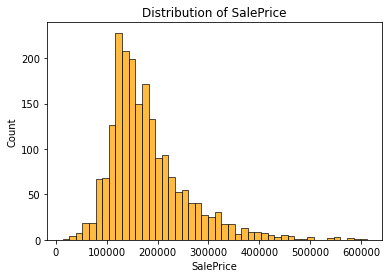

In [173]:
# Plot to see the distribution of the SalePrice
sns.histplot(y, color = 'orange').set(title='Distribution of SalePrice');

###### The distribution is positively skewed which shows there are more lower saleprices. Outliers are where saleprices are higher

In [174]:
# Do a train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [175]:
# Check the number of columns and rows after train test split to ensure they match
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1424, 247)
(1424,)
(611, 247)
(611,)


#### Import regression model

In [176]:
from sklearn.linear_model import LinearRegression

#### Instantiate model

In [177]:
lr = LinearRegression()

#### Find the Baseline Score

In [178]:
cross_val_score(lr, X, y, cv=5).mean()

0.9133200139819848

#### Fit the model

In [179]:
lr.fit(X_train, y_train)

LinearRegression()

#### Predict

In [180]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

#### R2_score, RMSE and Scatter plots 

In [181]:
# Evaluate model using R2
print(metrics.r2_score(y_pred_train_lr, y_train))
print(metrics.r2_score(y_pred_test_lr, y_test))

0.9385746177972054
0.8988297099327087


In [182]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lr)))

18947.794034827177
23383.849208622036


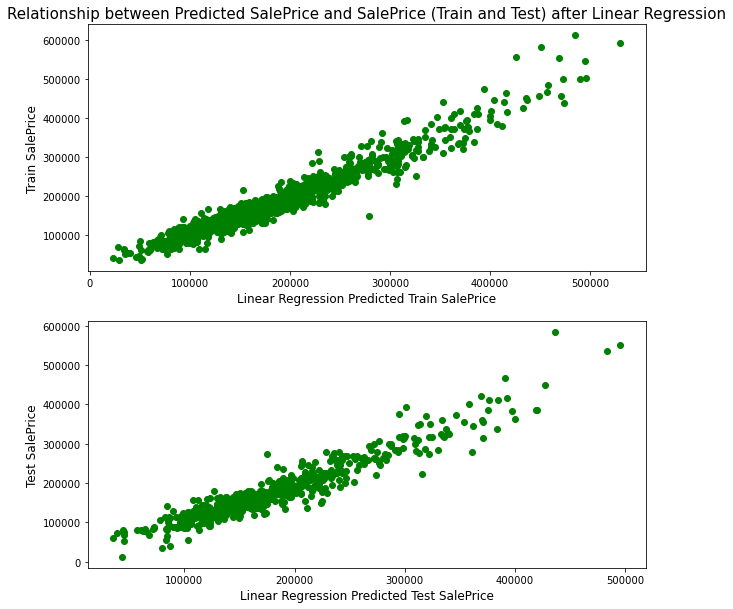

In [183]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after Linear Regression', fontsize = 15)
ax[0].scatter(y_pred_train_lr, y_train, color = 'green')
ax[0].set_xlabel("Linear Regression Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_lr, y_test, color = 'green')
ax[1].set_xlabel('Linear Regression Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

### 7.1.2 RidgeCV Regression (Using MinMaxScaler)

In [184]:
# Import model
from sklearn.preprocessing import MinMaxScaler

In [185]:
# Instantiate model
mms = MinMaxScaler()

In [186]:
# Fit Model
Z_train_mms = mms.fit_transform(X_train)
Z_test_mms = mms.transform(X_test)

In [187]:
# Import regression model
from sklearn.linear_model import RidgeCV

In [188]:
# Fit into regression model and predict
r_alphas = np.logspace(0.99,1,1)

ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)

ridge_cv.fit(Z_train_mms, y_train)

y_pred_train_mms_rcv = ridge_cv.predict(Z_train_mms)
y_pred_test_mms_rcv = ridge_cv.predict(Z_test_mms)

In [189]:
# Evaluate using R2
print(metrics.r2_score(y_pred_train_mms_rcv, y_train))
print(metrics.r2_score(y_pred_test_mms_rcv, y_test))

0.9187970328414066
0.8973243616877041


In [190]:
# Evaluate using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mms_rcv)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_mms_rcv)))

21002.224817585135
22603.7621942956


In [191]:
# Find optimum alpha
ridge_cv.alpha_

9.772372209558107

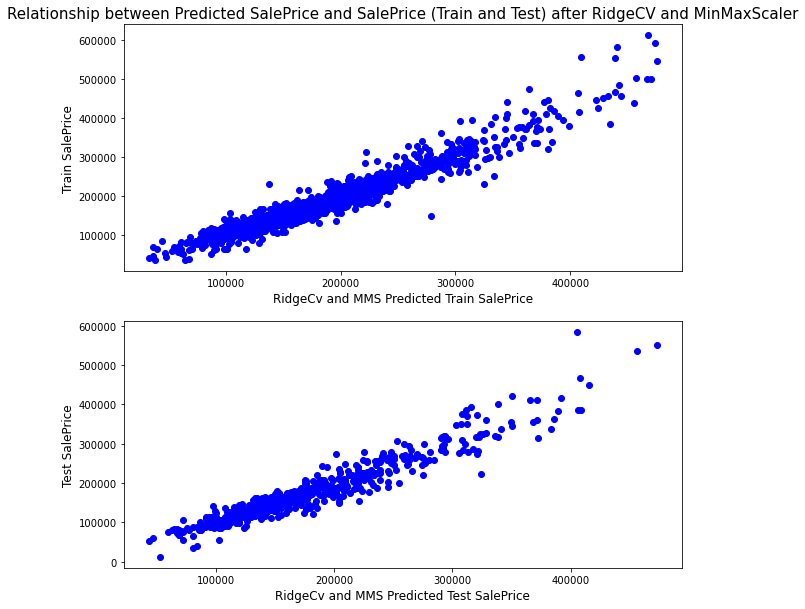

In [192]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after RidgeCV and MinMaxScaler', fontsize = 15)
ax[0].scatter(y_pred_train_mms_rcv, y_train, color = 'blue')
ax[0].set_xlabel("RidgeCv and MMS Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_mms_rcv, y_test, color = 'blue')
ax[1].set_xlabel('RidgeCv and MMS Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

### 7.1.3 LassoCV Regression (Using MinMaxScaler)

In [193]:
# Import regression model
from sklearn.linear_model import LassoCV

In [194]:
# Fit into regression model and predict
l_alphas = np.logspace(-5.5,5,20)

lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000, n_jobs = -1)

lasso_cv.fit(Z_train_mms, y_train)

y_pred_train_mms_lcv = lasso_cv.predict(Z_train_mms)
y_pred_test_mms_lcv = lasso_cv.predict(Z_test_mms)

In [195]:
# Evaluate model using R2
print(metrics.r2_score(y_pred_train_mms_lcv, y_train))
print(metrics.r2_score(y_pred_test_mms_lcv, y_test))

0.928226742516747
0.9085693922788619


In [196]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mms_lcv)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_mms_lcv)))

20185.661662702485
21829.946172206095


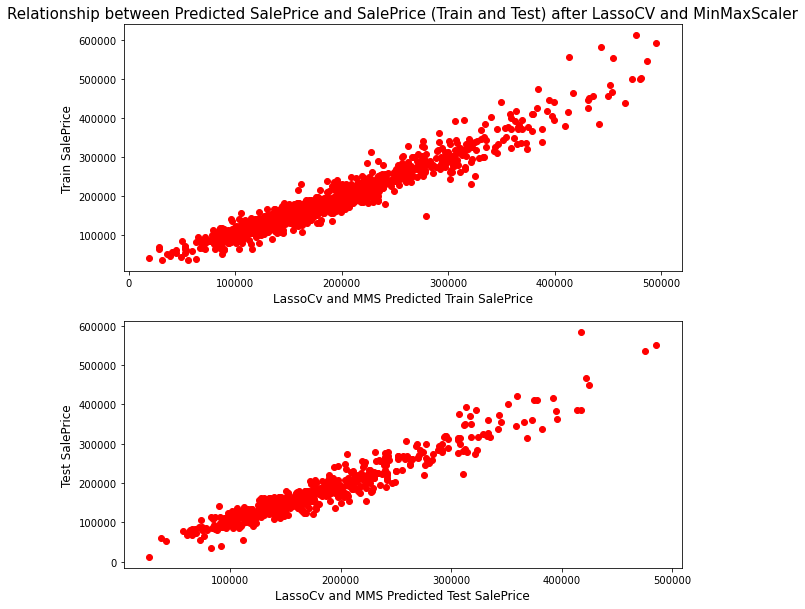

In [197]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after LassoCV and MinMaxScaler', fontsize = 15)
ax[0].scatter(y_pred_train_mms_lcv, y_train, color = 'red')
ax[0].set_xlabel("LassoCv and MMS Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_mms_lcv, y_test, color = 'red')
ax[1].set_xlabel('LassoCv and MMS Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

### 7.1.4 RidgeCV Using StandardScaler

In [198]:
# Import regression model
from sklearn.preprocessing import StandardScaler

In [199]:
# Instatiate model
sc = StandardScaler()

In [200]:
# Fit the model
Z_train_sc = sc.fit_transform(X_train)
Z_test_sc = sc.transform(X_test)

In [201]:
# Fit into regression model and predict
r_alphas2 = np.logspace(3,2.8,5)

ridge_cv2 = RidgeCV(alphas = r_alphas2, cv=10)

ridge_cv2.fit(Z_train_sc, y_train)

y_pred_train_sc_rcv = ridge_cv2.predict(Z_train_sc)
y_pred_test_sc_rcv = ridge_cv2.predict(Z_test_sc)

In [202]:
# Evaluate model using R2
print(metrics.r2_score(y_pred_train_sc_rcv, y_train))
print(metrics.r2_score(y_pred_test_sc_rcv, y_test))

0.9138276885379794
0.8934040495029965


In [203]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_sc_rcv)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_sc_rcv)))

21159.12607573564
22551.179855740655


In [204]:
ridge_cv.alpha_

9.772372209558107

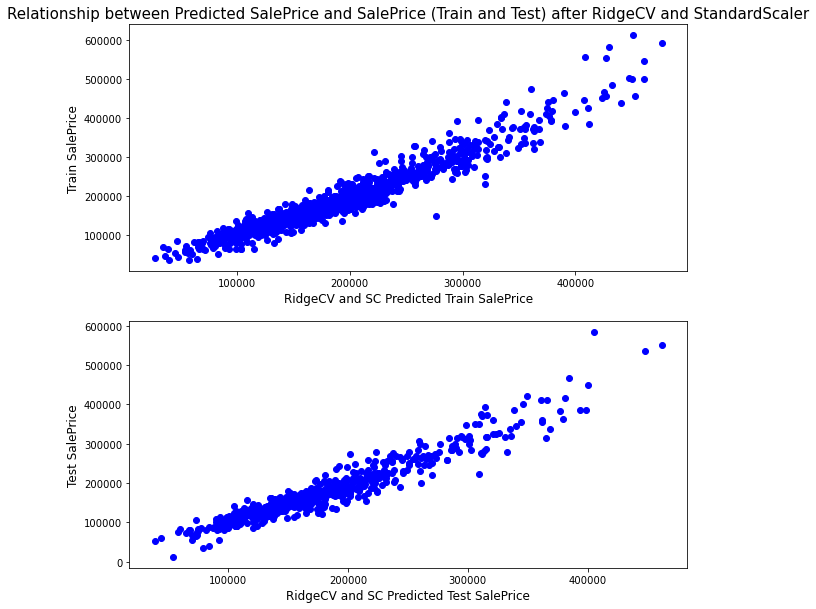

In [205]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after RidgeCV and StandardScaler', fontsize = 15)
ax[0].scatter(y_pred_train_sc_rcv, y_train, color = 'blue')
ax[0].set_xlabel("RidgeCV and SC Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_sc_rcv, y_test, color = 'blue')
ax[1].set_xlabel('RidgeCV and SC Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

### 7.1.5 LassoCV (Using StandardScaler)

In [206]:
# Import regression model
from sklearn.linear_model import LassoCV

In [207]:
# Fit into regression model and predict 
l_alphas = np.logspace(-4.95,12,30)

lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000, n_jobs = -1)

lasso_cv.fit(Z_train_sc, y_train)

y_pred_train_sc_lcv = lasso_cv.predict(Z_train_sc)
y_pred_test_sc_lcv = lasso_cv.predict(Z_test_sc)

In [208]:
# Evaluate model using R2
print(metrics.r2_score(y_pred_train_sc_lcv, y_train))
print(metrics.r2_score(y_pred_test_sc_lcv, y_test))

0.9288127841500292
0.9079570933978024


In [209]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_sc_lcv)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_sc_lcv)))

20010.724410096547
21789.592714679682


In [210]:
lasso_cv.alpha_

444.91378513929

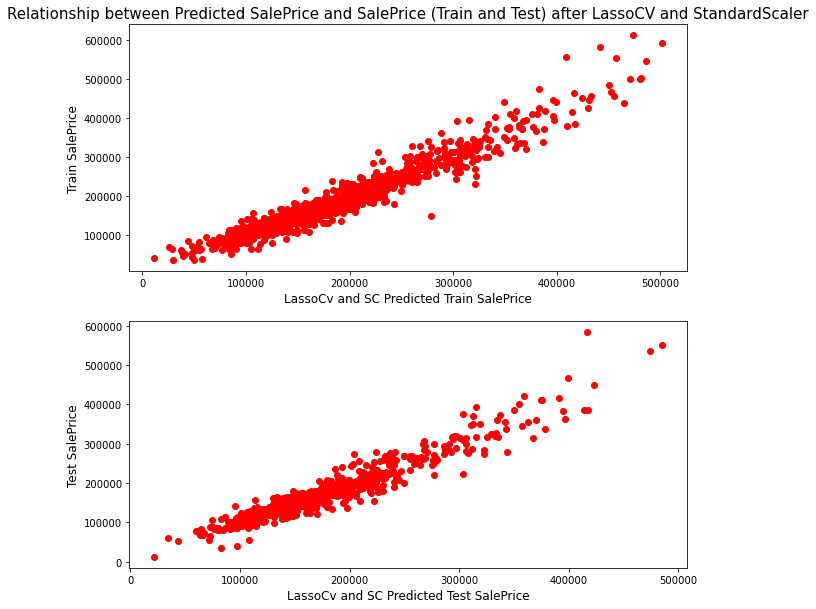

In [211]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after LassoCV and StandardScaler', fontsize = 15)
ax[0].scatter(y_pred_train_sc_lcv, y_train, color = 'red')
ax[0].set_xlabel("LassoCv and SC Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_sc_lcv, y_test, color = 'red')
ax[1].set_xlabel('LassoCv and SC Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

### Features Selection (SelectKBest)

In [212]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

mutual_info_features = SelectKBest(mutual_info_regression, k = 10) 
X_kbest_features = mutual_info_features.fit_transform(X, y)
mask = mutual_info_features.get_support()
new_feature = []
for bool,feature in zip(mask,X.columns):
    if bool:
        new_feature.append(feature)
list3=new_feature
list3

['Overall Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Age of House']

## 7.2 Regression after Features Selection 

###### Based on SelectKBest, use these 10 features ['Overall Qual', ' Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Kitchen Qual', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Age of House']

In [213]:
# To print out the train columns
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Gar

In [214]:
X2 = train.drop(columns = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
                           'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
                           'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
                           'Condition 2', 'Bldg Type', 'House Style',
                           'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                           'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
                           'Exter Cond', 'Foundation', 'Bsmt Cond', 'Bsmt Exposure',
                           'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
                           'Bsmt Unf SF', 'Heating', 'Heating QC', 'Central Air',
                           'Electrical', '2nd Flr SF', 'Low Qual Fin SF',
                           'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
                           'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
                           'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
                           'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
                           'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
                           'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val',
                           'Sale Type', 'SalePrice', 'Remod/Add', 'New Garage'])

y2 = train['SalePrice']

In [215]:
X2.shape

(2035, 10)

In [216]:
# To check that the 10 features are correct
X2.head()

,Overall Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Kitchen Qual,Garage Finish,Garage Cars,Garage Area,Age of House
0,6,3,725.0,725,1479,4,2,2.0,475.0,34
1,7,4,913.0,913,2122,4,2,2.0,559.0,13
2,5,3,1057.0,1057,1057,4,1,1.0,246.0,57
3,5,4,384.0,744,1444,3,3,2.0,400.0,4
4,6,2,676.0,831,1445,3,1,2.0,484.0,110


#### Plot heatmap to observe the correlations between the 10 selected features

<AxesSubplot:>

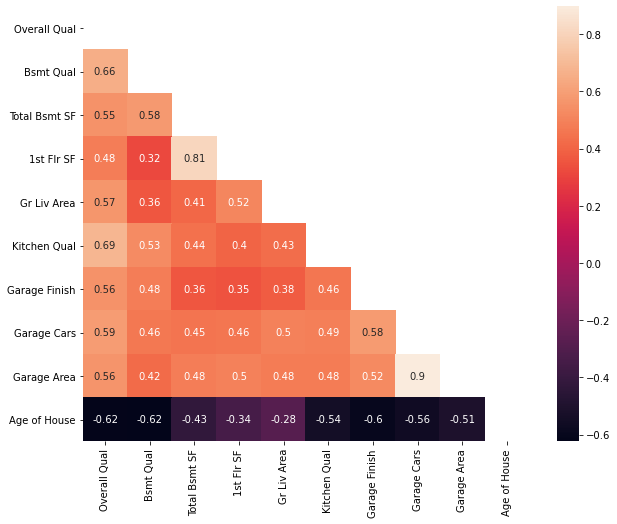

In [217]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, mask = mask)

In [218]:
# Do train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2 , test_size = 0.3, random_state = 42)

In [219]:
# Check the number of columns and rows after train test split to ensure they match
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(1424, 10)
(1424,)
(611, 10)
(611,)


### 7.2.1 RidgeCV (Using MinMaxScaler)

In [220]:
# Instatiate model
mms = MinMaxScaler()

In [221]:
# Fit the model
Z_train_mms2 = mms.fit_transform(X_train2)
Z_test_mms2 = mms.transform(X_test2)

In [222]:
# Fit into regression model and predict
r_alphas = np.logspace(0.01,0.01,100)

ridge_cv = RidgeCV(alphas=r_alphas, cv=10)

ridge_cv.fit(Z_train_mms2, y_train2)

y_pred_train_mms_rcv2 = ridge_cv.predict(Z_train_mms2)
y_pred_test_mms_rcv2 = ridge_cv.predict(Z_test_mms2)

In [223]:
# Evaluate model using R2
print(metrics.r2_score(y_train2, y_pred_train_mms_rcv2))
print(metrics.r2_score(y_test2, y_pred_test_mms_rcv2))

0.8420991943292662
0.8431964287540278


In [224]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train_mms_rcv2)))
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test_mms_rcv2)))

31298.36341100161
30079.625088716395


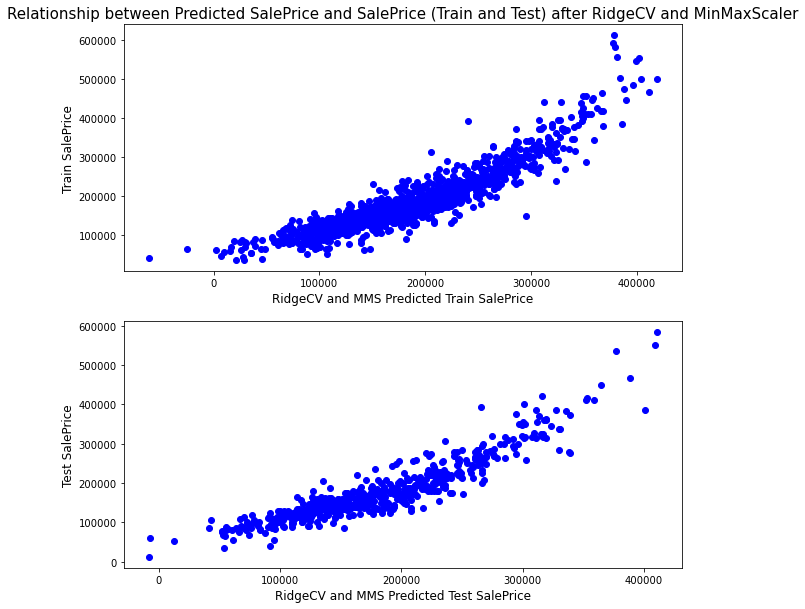

In [225]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after RidgeCV and MinMaxScaler', fontsize = 15)
ax[0].scatter(y_pred_train_mms_rcv2, y_train, color = 'blue')
ax[0].set_xlabel("RidgeCV and MMS Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_mms_rcv2, y_test, color = 'blue')
ax[1].set_xlabel('RidgeCV and MMS Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

### 7.2.2 LassoCV (Using MinMaxScaler)

In [226]:
# Fit into regression model and predict
l_alphas = np.logspace(-10,10,10)

lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000, n_jobs = -1, random_state = 42)

lasso_cv.fit(Z_train_mms2, y_train2)

y_pred_train_mms_lcv2 = lasso_cv.predict(Z_train_mms2)
y_pred_test_mms_lcv2 = lasso_cv.predict(Z_test_mms2)

In [227]:
# Evaluate model using R2
print(metrics.r2_score(y_train2, y_pred_train_mms_lcv2))
print(metrics.r2_score(y_test2, y_pred_test_mms_lcv2))

0.8423024929620867
0.8437462602071178


In [228]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train_mms_lcv2)))
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test_mms_lcv2)))

31278.20846669934
30026.841700027962


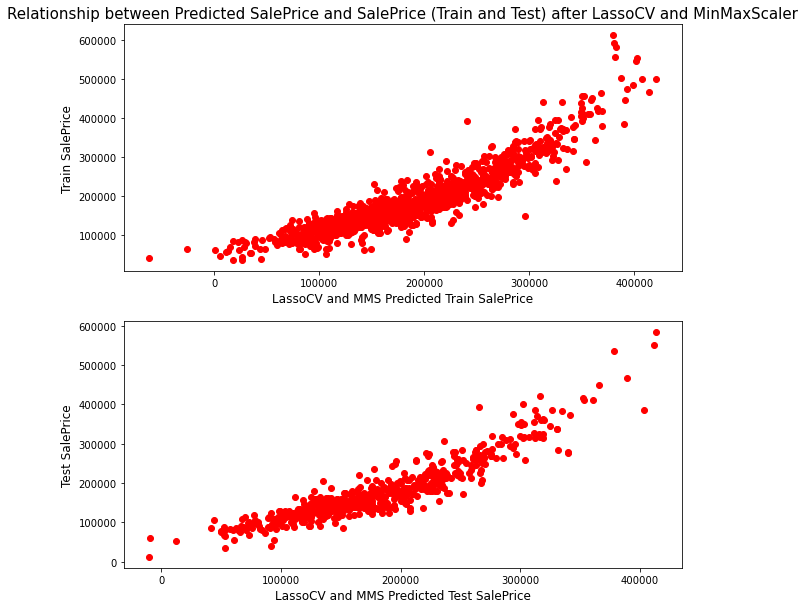

In [229]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after LassoCV and MinMaxScaler', fontsize = 15)
ax[0].scatter(y_pred_train_mms_lcv2, y_train, color = 'red')
ax[0].set_xlabel("LassoCV and MMS Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_mms_lcv2, y_test, color = 'red')
ax[1].set_xlabel('LassoCV and MMS Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

## 7.2.2 RidgeCV (Using StandardScaler)

In [230]:
# Instatiate the model
sc = StandardScaler()

In [231]:
# Fit the model
Z_train_sc2 = sc.fit_transform(X_train2)
Z_test_sc2 = sc.transform(X_test2)

In [232]:
# Fit into regression model predict
r_alphas = np.logspace(0,1,1)

ridge_cv2 = RidgeCV(alphas=r_alphas, cv=5)

ridge_cv2.fit(Z_train_sc2, y_train2)

y_pred_train_sc_rcv2 = ridge_cv2.predict(Z_train_sc2)
y_pred_test_sc_rcv2 = ridge_cv2.predict(Z_test_sc2)

In [233]:
# Evaluate model using R2
print(metrics.r2_score(y_train2, y_pred_train_sc_rcv2))
print(metrics.r2_score(y_test2, y_pred_test_sc_rcv2))

0.8423023352503044
0.8437398416401409


In [234]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train_sc_rcv2)))
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test_sc_rcv2)))

31278.224107215367
30027.458412676337


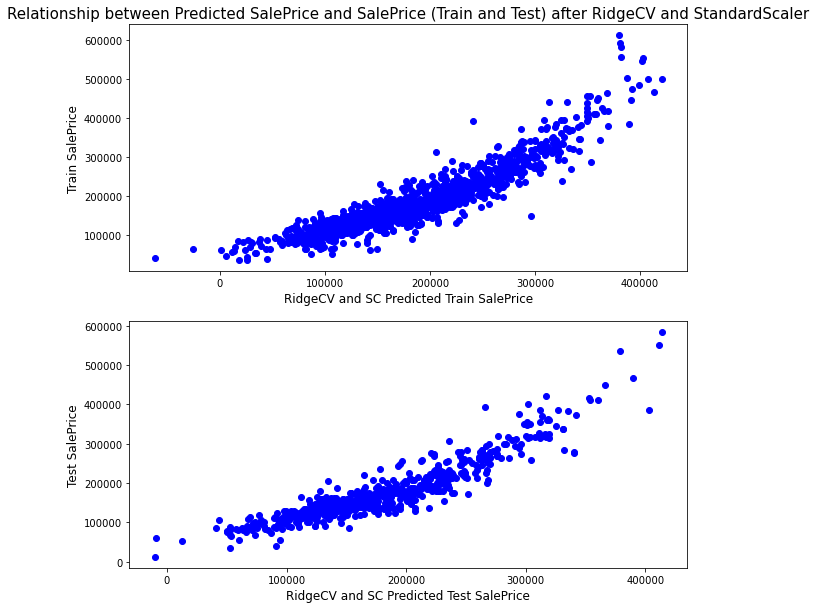

In [235]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after RidgeCV and StandardScaler', fontsize = 15)
ax[0].scatter(y_pred_train_sc_rcv2, y_train, color = 'blue')
ax[0].set_xlabel("RidgeCV and SC Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_sc_rcv2, y_test, color = 'blue')
ax[1].set_xlabel('RidgeCV and SC Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

## 7.2.2 LassoCV (Using StandardScaler)

In [236]:
# Fit into regression model predict
l_alphas = np.logspace(-1,5,1)

lasso_cv2 = LassoCV(alphas=l_alphas, cv=10, max_iter=50000, n_jobs = -1)

lasso_cv2.fit(Z_train_sc2, y_train2)

y_pred_train_sc_lcv2 = lasso_cv2.predict(Z_train_sc2)
y_pred_test_sc_lcv2 = lasso_cv2.predict(Z_test_sc2)

In [237]:
# Evaluate model using R2
print(metrics.r2_score(y_train2, y_pred_train_sc_lcv2))
print(metrics.r2_score(y_test2, y_pred_test_sc_lcv2))

0.8423024936814523
0.8437465211724146


In [238]:
# Evaluate model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train_sc_lcv2)))
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test_sc_lcv2)))

31278.20839535875
30026.81662553395


In [239]:
lasso_cv2.alpha_

0.1

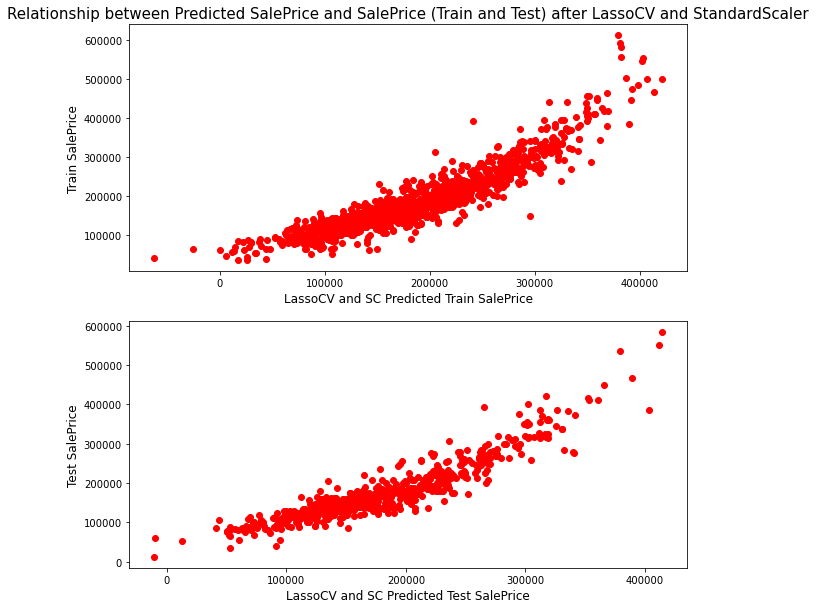

In [240]:
# Plot relationship between predicted saleprice against non predicted saleprice
fig, ax = plt.subplots(2, figsize = (10, 10))

ax[0].set_title('Relationship between Predicted SalePrice and SalePrice (Train and Test) after LassoCV and StandardScaler', fontsize = 15)
ax[0].scatter(y_pred_train_sc_lcv2, y_train, color = 'red')
ax[0].set_xlabel("LassoCV and SC Predicted Train SalePrice", fontsize = 12)
ax[0].set_ylabel('Train SalePrice', fontsize = 12)

ax[1].scatter(y_pred_test_sc_lcv2, y_test, color = 'red')
ax[1].set_xlabel('LassoCV and SC Predicted Test SalePrice', fontsize = 12)
ax[1].set_ylabel("Test SalePrice", fontsize = 12)

fig.show;

##### For all the models, the relationship is slightly curve and not linear as compared to before features selection which suggest underfitting

# 8. Prediction for Target Variable (SalePrice) on Test Dataset using the Best Model

In [241]:
print('Linear Regression')
print('==================')
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_lr)))
print('     ')
print('RidgeCV with MinMaxScaler')
print('==================')
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mms_rcv)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_mms_rcv)))
print('     ')
print('RidgeCV with StandardScaler')
print('==================')
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_sc_rcv)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_sc_rcv)))
print('     ')
print('LassoCV with MinMaxScaler')
print('==================')
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_mms_lcv)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_mms_lcv)))
print('     ')
print('LassoCV with StandardScaler')
print('==================')
print('RMSE')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_sc_lcv)))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_sc_lcv)))

print('    ')
print('Based on the RMSE results, LassoCV with MinMaxScaler is the best model in this case')

Linear Regression
RMSE
18947.794034827177
23383.849208622036
     
RidgeCV with MinMaxScaler
RMSE
21002.224817585135
22603.7621942956
     
RidgeCV with StandardScaler
RMSE
21159.12607573564
22551.179855740655
     
LassoCV with MinMaxScaler
RMSE
20185.661662702485
21829.946172206095
     
LassoCV with StandardScaler
RMSE
20010.724410096547
21789.592714679682
    
Based on the RMSE results, LassoCV with MinMaxScaler is the best model in this case


### 8.1 Examine the residuals on the best model (LassoCV with MixMaxScaler)

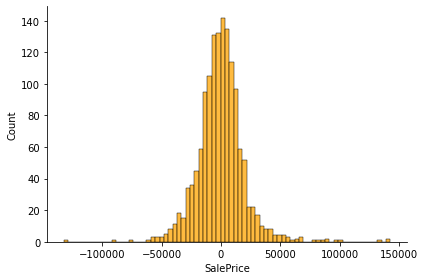

In [242]:
resids = y_train - y_pred_train_mms_lcv
sns.displot(resids, color = 'orange', height = 4, aspect = 1.5);

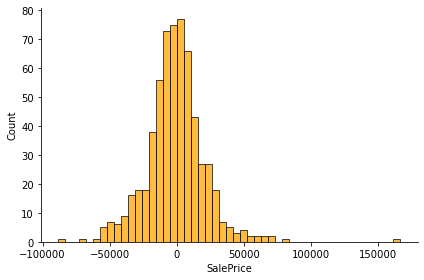

In [243]:
resids = y_test - y_pred_test_mms_lcv
sns.displot(resids, color = 'orange', height = 4, aspect = 1.5);

###### The distribution for both residual are normally distributed. However, there are outliers where the difference in saleprices are the higher

### 8.2 Using LassoCV with MinMaxScaler to predict on Test Dataset

#### Compare and make both test_dummies and train_dummies datasets have the same number of columns

In [244]:
print(test_dummies.shape)
print(train_dummies.shape)

(878, 239)
(2035, 250)


In [245]:
# Find missing columns in train_dummies as compared to test_dummies
list = []
for x in test_dummies.columns:
    if x in train_dummies.columns:
        pass
    else:
        list.append(x)
        
print(list)

['Roof Matl_Metal', 'Roof Matl_Roll', 'Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Sale Type_VWD', 'Heating_Floor', 'Mas Vnr Type_CBlock']


In [246]:
train_dummies[['Roof Matl_Metal', 'Roof Matl_Roll', 'Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 
      'Sale Type_VWD', 'Heating_Floor', 'Mas Vnr Type_CBlock']] = 0

In [247]:
train_dummies.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,MS SubClass_180,MS SubClass_190,Roof Matl_Metal,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Sale Type_VWD,Heating_Floor,Mas Vnr Type_CBlock
0,109,533352170,69.0,13517,6,8,289.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
1,544,531379050,43.0,11492,7,5,132.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
2,153,535304180,68.0,7922,5,7,0.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,73.0,9802,5,5,0.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
4,255,906425045,82.0,14235,6,8,0.0,2,4,1,...,0,0,0,0,0,0,0,0,0,0


In [248]:
# Find missing columns in test_dummies as compared to train_dummies
list = []
for x in train_dummies.columns:
    if x in test_dummies.columns:
        pass
    else:
        list.append(x)
        
print(list)

['SalePrice', 'MS Zoning_A (agr)', 'Utilities_NoSeWa', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Condition 2_Artery', 'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn', 'Roof Matl_Membran', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone', 'Heating_OthW', 'Heating_Wall', 'Electrical_Mix', 'MS SubClass_150']


In [249]:
test_dummies[['SalePrice', 'MS Zoning_A (agr)', 'Utilities_NoSeWa', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk',
       'Condition 2_Artery', 'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRAn',
       'Condition 2_RRNn', 'Roof Matl_Membran', 'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 
       'Exterior 1st_Stone', 'Exterior 2nd_Stone', 'Heating_OthW', 'Heating_Wall',
       'Electrical_Mix', 'MS SubClass_150']] = 0

In [250]:
test_dummies.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Condition 2_RRNn,Roof Matl_Membran,Exterior 1st_CBlock,Exterior 1st_ImStucc,Exterior 1st_Stone,Exterior 2nd_Stone,Heating_OthW,Heating_Wall,Electrical_Mix,MS SubClass_150
0,2658,902301120,69.0,9142,6,8,0.0,2,3,1,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,70.0,9662,5,4,0.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,58.0,17104,7,5,0.0,4,4,3,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,60.0,8520,5,6,0.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,70.0,9500,6,5,247.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0


In [251]:
X_train3 = train_dummies.drop(columns = ['SalePrice', 'Id', 'PID'])
X_test3 = test_dummies.drop(columns = ['SalePrice', 'Id', 'PID'])
y_train3 = train_dummies['SalePrice']

In [252]:
print(train_dummies.shape)
print(test_dummies.shape)

(2035, 258)
(878, 258)


In [253]:
mms = MinMaxScaler()

In [254]:
Z_train_mms2 = mms.fit_transform(X_train3)
Z_test_mms2 = mms.transform(X_test3)

In [255]:
# Fit into regression model and predict
l_alphas = np.logspace(-5.5,5,20)

lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000, n_jobs = -1)

lasso_cv.fit(Z_train_mms2, y_train3)

y_pred_test_mms_lcv_test = lasso_cv.predict(Z_test_mms2)

print(y_pred_test_mms_lcv_test)

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3227684791.4804688, tolerance: 1099734451.3396442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21860531384.792236, tolerance: 1124974736.6607199
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25197094446.053833, tolerance: 1118220975.603351
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31678500189.71405, tolerance: 1069341312.0219603
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35894990601.67041, tolerance: 1099734451.3396442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35022033570.07056, tolerance: 1124974736.6607199
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ben/opt/anaconda3/lib/python3.8/site-packages/sklearn/

[127258.26125178 158553.60387554 178931.48801741  95661.35994712
 148542.03401858  61143.72792668  69351.88940653 121918.60718838
 136904.46611873 129521.99432591 141257.9145245   75171.87640912
 128663.42728415 304483.73665897 168234.48301022 111617.18454796
 152336.02982346  69159.90918154 179150.54800594 227711.87745046
 139743.99971814 149116.14846334 182568.74310812 146739.82649412
 163228.59726811  87347.52868079 168815.15819708 150592.66368715
 179613.73405826  54409.65989845  68238.00481166  50830.51188955
 208467.51243577 132633.5298588  178842.15564462 156611.65243776
 111623.1250801   88655.07597874  84254.36019167 147023.43356183
 124391.1655664  163590.39026232 115630.64613197 143758.09210262
 233920.54317185  68027.70746699 184932.99432041 103009.2623757
  87647.72875301 153134.7654786   92045.24021556 196706.30072289
 199968.40590917 101315.57368193 116897.98580373 120997.83665583
 149034.77715355 100401.15294408 122198.41226721 189010.79492054
 271992.78932288 160978.02

### 8.3 Read sample_sub_reg dataset to see the submission format

In [256]:
sample = pd.read_csv('datasets/sample_sub_reg.csv')

In [257]:
sample.shape

(878, 2)

In [258]:
# To check that the number of values are the same 
print(len(y_pred_test_mms_lcv_test))

878


In [259]:
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


### 8.4 Make predicted SalePrices for test dataset into DataFrame and convert to csv for submitting to Kaggle

In [260]:
rounded = np.round(y_pred_test_mms_lcv_test, 4)
df = pd.DataFrame(rounded, columns = ['SalePrice'])
df.head()

,SalePrice
0,127258.2613
1,158553.6039
2,178931.4880
3,95661.3599
4,148542.0340


In [261]:
df['Id'] = test_dummies['Id']
df = df[['Id', 'SalePrice']]
df.head()

,Id,SalePrice
0,2658,127258.2613
1,2718,158553.6039
2,2414,178931.4880
3,1989,95661.3599
4,625,148542.0340


In [262]:
# df.to_csv('Test_predictions.csv')

# 9. Conclusions and Recommendations

After modeling and Kaggle Challenge, Lasso regression using MixMaxScaler with cross validation is deemed to the be best model. However, there seems to be more outliers within the dataset alhough the distribution of the residuals are normally distributed but there a few large differences between actual and predicted sale price. The prototype model which 10 best features has a much higher root mean squared errors and is deem to be underfitting due to the simplicity of the model and the non-linearity between the actual and predicted sale price.

After modeling and Kaggle Challenge, Lasso regression using MixMaxScaler with cross validation is deemed to the be best model. However, there seems to be more outliers within the dataset alhough the distribution of the residuals are normally distributed but there a few large differences between actual and predicted sale price. The prototype model which 10 best features has a much higher root mean squared errors and is deem to be underfitting due to the simplicity of the model and the non-linearity between the actual and predicted sale price.

For a better and more accurate prediction for the sale price, users on our app will be recommended to key in more feature details other than just the 10 basic features.

In conclusion, further modeling will be carry out to minimise the underfitting problem and root mean squared error (RMSE). A deeper exploration will be needed on the dataset and enhanced feature engineering will be perform.

